In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
tf.random.set_seed(1)

In [2]:
def makeNN(input_dim, output_dim, width, depth, reg_param):
# construct and initialize the neural network

  initializer = tf.keras.initializers.RandomUniform(minval=-1., maxval=1.)

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  for i in range(depth-1):
    model.add(tf.keras.layers.Dense(width, activation = tf.nn.tanh, kernel_initializer=initializer,
                                   kernel_regularizer=tf.keras.regularizers.L2(reg_param))) 

  model.add(tf.keras.layers.Dense(output_dim, activation=None, kernel_initializer=initializer))
  return model


In [4]:
# define the input parameters
input_dim = 1
output_dim = 1
width = 15
depth = 10
reg_arr = [0,1e-4,1e-3,1e-2]
num_epochs = 5000

# define the training and validation data (part 2)
x = np.linspace(0,1,125)
np.random.seed(0)
noise = np.random.normal(0,0.2,125)
y = np.sin(10*np.pi*x) + noise
val_ind = np.zeros(y.shape, dtype=np.bool)
val_ind[4::5] = True
y_val = y[val_ind]
x_val = x[val_ind]
y_train = y[~val_ind]
x_train = x[~val_ind]


val_loss_history = np.zeros((3,num_epochs, len(reg_arr)))
loss_history = np.zeros((3,num_epochs, len(reg_arr)))

y_predict_train = np.zeros((3, len(reg_arr),len(x_train)))
y_predict_val = np.zeros((3, len(reg_arr),len(x_val)))

for ind in range(len(reg_arr)):
  print('For regularization param = {}'.format(reg_arr[ind]))
  for run_ind in range(3):
    model = makeNN(input_dim, output_dim, width, depth, reg_arr[ind])
    opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(opt, loss='mse', metrics=["mse"])

    # save the training and validation loss
    history_callback = model.fit(x_train, y_train, epochs=num_epochs, verbose=0, batch_size=25, shuffle=True, validation_data = (x_val,y_val))
    loss_history[run_ind,:,ind] = history_callback.history["loss"]
    val_loss_history[run_ind,:,ind] = history_callback.history["val_loss"]
    print('   run # {}, training loss = {} / validation loss = {}'.format(run_ind, loss_history[run_ind,-1,ind], val_loss_history[run_ind,-1,ind])) 
    
    # save the prediction of the model
    model.predict(x_train).shape 
    y_predict_train[run_ind,ind,:] = np.reshape(model.predict(x_train),len(x_train))
    y_predict_val[run_ind,ind,:] = np.reshape(model.predict(x_val),len(x_val))  
   

For regularization param = 0
   run # 0, training loss = 0.0184787530452013 / validation loss = 0.050451211631298065
   run # 1, training loss = 0.024353913962841034 / validation loss = 0.05024373531341553
   run # 2, training loss = 0.026672858744859695 / validation loss = 0.04887698218226433
For regularization param = 0.0001
   run # 0, training loss = 0.07862445712089539 / validation loss = 0.09984567016363144
   run # 1, training loss = 0.07654763013124466 / validation loss = 0.09452507644891739
   run # 2, training loss = 0.07300834357738495 / validation loss = 0.09002953767776489
For regularization param = 0.001
   run # 0, training loss = 0.22268076241016388 / validation loss = 0.19918093085289001
   run # 1, training loss = 0.2096930742263794 / validation loss = 0.17748568952083588
   run # 2, training loss = 0.18480642139911652 / validation loss = 0.1704506129026413
For regularization param = 0.01
   run # 0, training loss = 0.5742807984352112 / validation loss = 0.56289130449

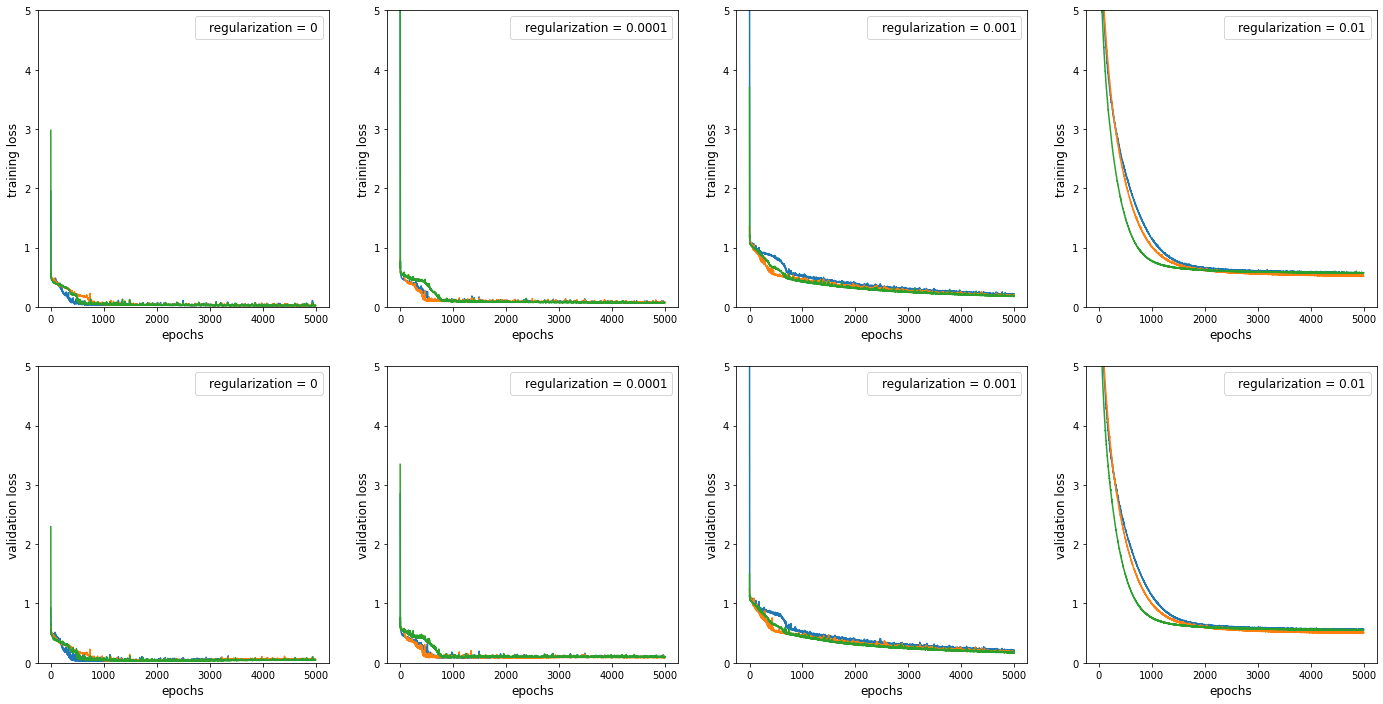

In [5]:
# part 4
fig, axs = plt.subplots(2, 4, figsize=(24, 12))
for ind in range(len(reg_arr)):
  # plot training loss for the three re-runs
  axs[0,ind].plot(loss_history[0,:,ind])
  axs[0,ind].plot(loss_history[1,:,ind])
  axs[0,ind].plot(loss_history[2,:,ind])

  # plot validation loss for the three re-runs
  axs[1,ind].plot(val_loss_history[0,:,ind])
  axs[1,ind].plot(val_loss_history[1,:,ind])
  axs[1,ind].plot(val_loss_history[2,:,ind])

  leg_items = [Patch(label='regularization = {}'.format(reg_arr[ind]))]
  axs[0,ind].legend(handles=leg_items, loc='upper right', handlelength=0,fontsize=12)
  axs[1,ind].legend(handles=leg_items, loc='upper right', handlelength=0,fontsize=12)
  axs[0,ind].set_ylabel('training loss',fontsize=12)
  axs[1,ind].set_ylabel('validation loss',fontsize=12)
  axs[0,ind].set_xlabel('epochs',fontsize=12)
  axs[1,ind].set_xlabel('epochs',fontsize=12)
  axs[0, ind].set_ylim(0, 5)
  axs[1, ind].set_ylim(0, 5)

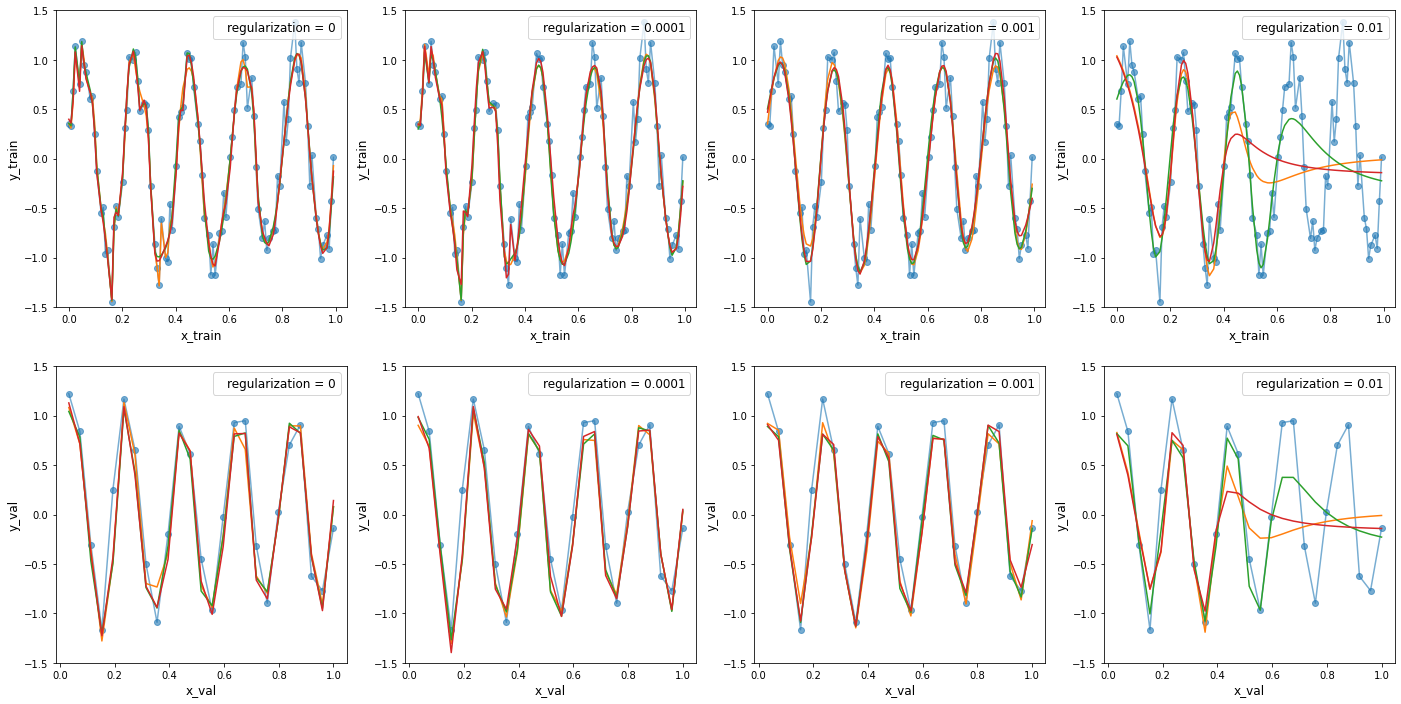

In [6]:
# part 4
fig, axs = plt.subplots(2, 4, figsize=(24, 12))
for ind in range(len(reg_arr)):
  # plot the model prediction on training data
  axs[0,ind].errorbar(x_train, y_train, marker='o', alpha=0.6, zorder=1)
  axs[0,ind].plot(x_train, y_predict_train[0,ind,:], zorder=2)
  axs[0,ind].plot(x_train, y_predict_train[1,ind,:], zorder=3)
  axs[0,ind].plot(x_train, y_predict_train[2,ind,:], zorder=4)

  # plot the model prediction on validation data
  axs[1,ind].errorbar(x_val, y_val,marker='o', alpha=0.6, zorder=1)
  axs[1,ind].plot(x_val, y_predict_val[0,ind,:], zorder=2)
  axs[1,ind].plot(x_val, y_predict_val[1,ind,:], zorder=3)
  axs[1,ind].plot(x_val, y_predict_val[2,ind,:], zorder=4)

  leg_items = [Patch(label='regularization = {}'.format(reg_arr[ind]))]
  axs[0,ind].legend(handles=leg_items, loc='upper right', handlelength=0,fontsize=12)
  axs[1,ind].legend(handles=leg_items, loc='upper right', handlelength=0,fontsize=12)
  axs[0,ind].set_ylabel('y_train',fontsize=12)
  axs[1,ind].set_ylabel('y_val',fontsize=12)
  axs[0,ind].set_xlabel('x_train',fontsize=12)
  axs[1,ind].set_xlabel('x_val',fontsize=12)
  axs[0, ind].set_ylim(-1.5, 1.5)
  axs[1, ind].set_ylim(-1.5, 1.5)

Part (5)
(5-a) From the printed out results and figure 1, we can see that the training and validation loss are very small. However, by plotting the prediction on the trainng and validation set, we see that the network appears to overfit the data, closely capturing all the noisy data points as well. 

(5-b) By adding regularization, we see that the prediction appears to smooth out, better representing the actual sine function without the noise. However, as we increase the regularization, the loss increases as well. Since it's not fitting as well to all of the training data points (including noisy ones)

(5-c) As we saw in (5-b), regularization can help with overfitting problems, but if it's too large (as we see here for reg_param = 0.01), the network will no longer be able to predict the function quite successfully, leading to high values of training and validation loss (at least for the same number of training epochs). The failure to predict the function is clearly observed in figure 2 for regularization = 0.01. 